install geopandas pacjake to read dor reading the shapefile

In [ ]:
!pip install geopandas

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [4]:
Belgium_map = gpd.GeoDataFrame.from_file('../data/arrondissements_shape/arrondissements_shape.shp')
#All four files (.dbf, .ptj, .shp, .shx) should be in the same folder, otherwise there are errors with reading the shapefile.

In [5]:
Belgium_map.head()

,Shape_Leng,Shape_Area,INS,LANG,Name1,Name2,geometry
0,169989.192808,1.003844e+09,11000,NN,Antwerpen,None,"POLYGON ((662106.376 740967.580, 662162.309 74..."
1,150947.175998,5.119499e+08,12000,NN,Mechelen,None,"POLYGON ((671311.591 707603.770, 671353.400 70..."
2,228401.102863,1.359241e+09,13000,NN,Turnhout,None,"MULTIPOLYGON (((688864.783 736887.001, 688888...."
3,62133.678433,1.625668e+08,21000,FN,Bruxelles,Brussel,"POLYGON ((653270.158 677320.255, 653291.392 67..."
4,281254.375729,9.488673e+08,23000,NN,Halle-Vilvoorde,None,"POLYGON ((643772.195 692449.425, 643815.652 69..."


Plot the shapefile

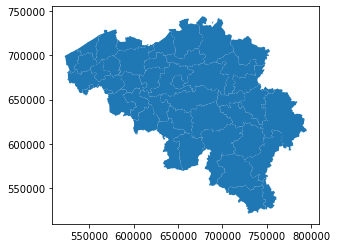

In [6]:
Belgium_map.plot()

Read the frequency file

In [7]:
heat_fr = pd.read_csv('../out/hw_freq_df.csv')
heat_fr.head()

,arron,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,41000,1,0,0,0,2,0,4,0,1,...,0,1,3,0,1,1,1,1,3,5
1,11000,1,0,0,0,2,0,4,0,1,...,0,1,3,0,1,1,1,1,3,5
2,81000,3,0,2,0,2,0,4,0,1,...,0,1,0,2,2,2,0,4,2,5
3,51000,1,0,0,0,2,0,4,0,1,...,0,1,0,1,1,1,0,2,2,5
4,45000,1,0,0,0,2,0,4,0,1,...,0,1,3,0,1,1,1,1,3,5


In [8]:
heat_intens = pd.read_csv('../out/hw_int_df.csv')
heat_intens.head()

,arron,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,41000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0,2.825,5.126667,0.00,0.64,2.100,0.6,1.320,1.40,4.010
1,11000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0,2.825,5.126667,0.00,0.64,2.100,0.6,1.320,1.40,4.010
2,81000,0.841667,0,1.15,0,1.025,0,1.72,0,2.0,...,0,2.400,0.000000,0.30,4.55,2.400,0.0,1.195,1.17,3.845
3,51000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0,3.050,0.000000,0.84,1.24,2.925,0.0,0.470,1.80,4.285
4,45000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0,2.825,5.126667,0.00,0.64,2.100,0.6,1.320,1.40,4.010


Keep only the necessary columns of a shapefile - geometry and code of arrondissement

In [9]:
Belgium_shapes = Belgium_map[['geometry', 'INS','Name1']]
Belgium_shapes = Belgium_shapes.rename(columns ={'INS':'arron'})
Belgium_shapes.head()

,geometry,arron,Name1
0,"POLYGON ((662106.376 740967.580, 662162.309 74...",11000,Antwerpen
1,"POLYGON ((671311.591 707603.770, 671353.400 70...",12000,Mechelen
2,"MULTIPOLYGON (((688864.783 736887.001, 688888....",13000,Turnhout
3,"POLYGON ((653270.158 677320.255, 653291.392 67...",21000,Bruxelles
4,"POLYGON ((643772.195 692449.425, 643815.652 69...",23000,Halle-Vilvoorde


In [10]:
list_10years = ['1980-1989', '1990-1999', '2000-2009', '2010-2019']
list_5years = ['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019']

# this function produces graphs for specific time intervals for frequency or intensity of heatwave

# data_type = ('freq', 'intensity')
def get_interval_intensity_or_count(list_year_intervals, data_type):
    if data_type == 'freq':
        df = heat_fr
        colors = 'Reds'
    else:
        df = heat_intens
        colors = 'YlOrBr'

    Belgium_shapes_merge = Belgium_shapes.merge(df, on='arron', suffixes=('', '_drop'))
    
    for i in list_year_intervals:
        start_str = i.split('-')[0]
        end_str = i.split('-')[1]
        Belgium_shapes_merge[i] = Belgium_shapes_merge.loc[: , start_str : end_str].mean(axis=1)
    
    fig, axees = plt.subplots(nrows=1, ncols=len(list_year_intervals), figsize=(18, 6))
    divider = make_axes_locatable(axees[-1])
    cax = divider.append_axes("right", size="5%", pad=0)
    vmin, vmax = 0, 4
    for ix, k in enumerate(axees):
        k.set_axis_off()
        k = Belgium_shapes_merge.plot(ax=k, column=list_year_intervals[ix], cmap=colors, legend=True, cax=cax, vmin=vmin, vmax=vmax)
        k.set_title(list_year_intervals[ix])
    return None

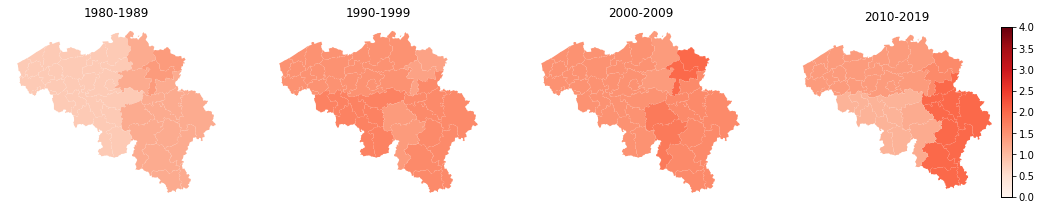

In [11]:
# chart for frequency for every 10 years (run a second time if it does not work)
data_type='freq'
get_interval_intensity_or_count(list_10years, data_type)

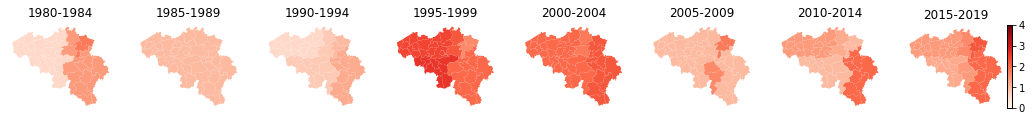

In [12]:
# chart for frequency for every 5 years (run a second time if it does not work)
data_type = 'freq'
get_interval_intensity_or_count(list_5years, data_type)

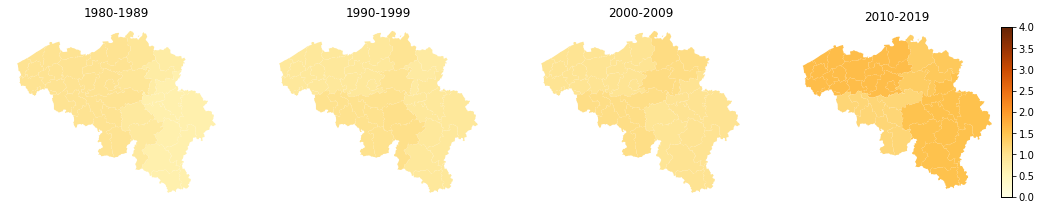

In [13]:
# chart for intensity for every 10 years (run a second time if it does not work)
data_type = 'intensity'
get_interval_intensity_or_count(list_10years, data_type)

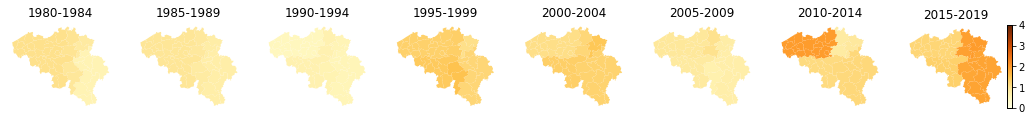

In [14]:
# chart for intensity for every 5 years (run a second time if it does not work)
data_type = 'intensity'
get_interval_intensity_or_count(list_5years, data_type)

<AxesSubplot:>

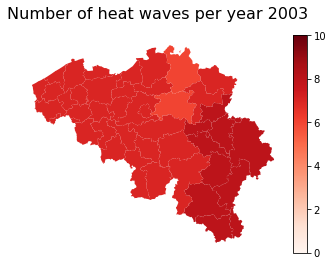

In [13]:
'''
This is merely for EDA (not part of pipeline)
'''

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)
ax.set_axis_off()
fig.suptitle('Number of heat waves per year 2003', fontsize=16)
cax = divider.append_axes("right", size="5%", pad=0.1)
vmin, vmax = 0, 10
Belgium_shapes_merge_eda = Belgium_shapes.merge(heat_fr, on='arron', suffixes=('', '_drop'))
Belgium_shapes_merge_eda.plot(column='2003', cmap='Reds', ax=ax, legend=True, cax=cax, vmin=vmin, vmax=vmax)

### Building App

In [1]:
import dash
from dash import html
from dash import dcc
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.express as px

from plotly.subplots import make_subplots

import plotly.graph_objects as go
import numpy as np
import pandas as pd


In [19]:
Belgium_shapes_intens = Belgium_shapes.merge(heat_intens, on='arron', suffixes=('', '_drop'))
Belgium_shapes_intens.head()

,geometry,arron,Name1,1980,1981,1982,1983,1984,1985,1986,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"POLYGON ((662106.376 740967.580, 662162.309 74...",11000,Antwerpen,3.875,0,0.00,0,1.35,0,2.250,...,0,2.825,5.126667,0.0,0.64,2.1,0.6,1.32,1.40,4.01
1,"POLYGON ((671311.591 707603.770, 671353.400 70...",12000,Mechelen,3.875,0,0.00,0,1.35,0,2.250,...,0,2.825,5.126667,0.0,0.64,2.1,0.6,1.32,1.40,4.01
2,"MULTIPOLYGON (((688864.783 736887.001, 688888....",13000,Turnhout,2.675,0,0.65,0,1.55,0,2.245,...,0,3.025,0.000000,0.0,4.41,2.1,0.3,0.62,2.13,3.69
3,"POLYGON ((653270.158 677320.255, 653291.392 67...",21000,Bruxelles,3.875,0,0.00,0,1.35,0,2.250,...,0,2.825,5.126667,0.0,0.64,2.1,0.6,1.32,1.40,4.01
4,"POLYGON ((643772.195 692449.425, 643815.652 69...",23000,Halle-Vilvoorde,3.875,0,0.00,0,1.35,0,2.250,...,0,2.825,5.126667,0.0,0.64,2.1,0.6,1.32,1.40,4.01


In [17]:
Belgium_shapes_merge = Belgium_shapes.merge(heat_fr, on='arron', suffixes=('', '_drop'))
Belgium_shapes_merge.head()

,geometry,arron,Name1,1980,1981,1982,1983,1984,1985,1986,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"POLYGON ((662106.376 740967.580, 662162.309 74...",11000,Antwerpen,1,0,0,0,2,0,4,...,0,1,3,0,1,1,1,1,3,5
1,"POLYGON ((671311.591 707603.770, 671353.400 70...",12000,Mechelen,1,0,0,0,2,0,4,...,0,1,3,0,1,1,1,1,3,5
2,"MULTIPOLYGON (((688864.783 736887.001, 688888....",13000,Turnhout,3,0,2,0,2,0,4,...,0,1,0,0,2,1,1,2,2,5
3,"POLYGON ((653270.158 677320.255, 653291.392 67...",21000,Bruxelles,1,0,0,0,2,0,4,...,0,1,3,0,1,1,1,1,3,5
4,"POLYGON ((643772.195 692449.425, 643815.652 69...",23000,Halle-Vilvoorde,1,0,0,0,2,0,4,...,0,1,3,0,1,1,1,1,3,5


In [20]:
from pyproj import crs
geo_intens=Belgium_shapes_intens.to_crs(epsg=4326)
json_intens= geo_intens.__geo_interface__ 
geo_freq=Belgium_shapes_merge.to_crs(epsg=4326)
json_freq= geo_freq.__geo_interface__ 
fig = px.choropleth(
       Belgium_shapes_merge, geojson=json_freq,locations=Belgium_shapes_merge.index, color='2000-2004',
    color_continuous_scale='reds',hover_name='Name1'
      )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

C:\Users\baris\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\baris\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['geometry', 'arron', 'Name1', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'] but received: 2000-2004

In [70]:
pooled=pd.read_csv('../data/pooled_relationship_plot.csv')
predreg=pd.read_csv('../data/blup_fs_region.csv')
studyspe=pd.read_csv('../data/temp_preds_model_arron.csv')
predreg=predreg.rename(columns={"blup_matRRfit":"BLUP","first_stage_blup_matRRfit":"First_stage"})
studyspe.head()


,y,temp,arron
0,1.109369,-5.0,Aalst
1,1.098790,-4.5,Aalst
2,1.088987,-4.0,Aalst
3,1.079942,-3.5,Aalst
4,1.071637,-3.0,Aalst


In [74]:
from dash import Dash, dcc, html
from dash.dependencies import  Input, Output
import plotly.express as px
import plotly.graph_objs as go

colorscales = []
year={}
for i in range(len(Belgium_shapes_merge.columns[3:])):
   
    year['label'] = Belgium_shapes_merge.columns[i+3]
    year['value'] = Belgium_shapes_merge.columns[i+3]
    colorscales.append(year)
    year={}

cities=[]
city={}
for i in range(len(predreg.arron.unique())):
   
    city['label'] = predreg.arron.unique()[i]
    city['value'] = predreg.arron.unique()[i]
    cities.append(city)
    city={}

    
app = Dash(__name__)

fig4 = px.line(studyspe, x="temp", y="y",color='arron')
fig4.update_layout(title="Study Specific",title_x=0.5,
                   xaxis_title='Temperature',
                   yaxis_title='Relative Risk')

app.layout = html.Div([
    html.H2('Heatwave Analysis',style={'text-align': 'center'}),
    html.P("Select the year:"),
    dcc.Dropdown(
        id='dropdown', 
        options=colorscales,
        value='1980'
    ),
    
    dbc.Row([
    dbc.Col(dcc.Graph(id="graph"),md=5),
    dbc.Col(dcc.Graph(id="graph2"),md=5)]),
    dcc.Dropdown(
        id='dropdown2', 
        options=cities,
        value='Leuven'
    ),
    dcc.Graph(id="graph3"),
    html.Hr(),
    dcc.Graph(id="graph4",figure=fig4)
    
])


@app.callback(
    Output("graph", "figure"), 
    Input("dropdown", "value"))
def change_colorscale(scale):
    df = Belgium_shapes_merge # replace with your own data source
    fig = px.choropleth(
       df, geojson=json_freq,locations=df.index, color=scale,
    color_continuous_scale=px.colors.sequential.OrRd,hover_name='Name1',range_color=[0,8]
      )
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(title=f"Heatwave Weeks in <b>{scale}</b>", title_x=0.5)
    return fig

@app.callback(
    Output("graph2", "figure"), 
    Input("dropdown", "value"))
def change_colorscale2(scale):
    df = Belgium_shapes_intens # replace with your own data source
    fig2 = px.choropleth(
       df, geojson=json_intens,locations=df.index, color=scale,
    color_continuous_scale=px.colors.sequential.OrRd,hover_name='Name1',range_color=[0,5.126667]
      )
    fig2.update_geos(fitbounds="locations", visible=False)
    fig2.update_layout(title=f"Heatwave Intensity in <b>{scale}</b>", title_x=0.5)
    return fig2

@app.callback(
    Output("graph3", "figure"), 
    Input("dropdown2", "value"))
def change_city(city):
    fig = px.line(predreg[predreg.arron==city], x="blup_predvar", y=["BLUP","First_stage"])
    fig.add_trace(go.Scatter(x=pooled['predvar'],y=pooled['matRRfit'],name="Population Average"))
    fig.update_layout(title=f"<b>{city}</b>",title_x=0.5,
                   xaxis_title='Temperature',
                   yaxis_title='Relative Risk')
    fig.show()
    return fig


app.run_server(debug=True,use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [82]:
#creating requirement.txt file
!pip freeze > requirements.txt